# Calculating the Radius of a supernova shockwave from the spectrum of a single epoch

In order to calculate the Radius of the shockwave of a supernova, I will assume the following mechanism:

In the last stages of a star's life, material from the star begins to blow out into the circumsterllar medium (CSM) such that the CSM includes mass and magentic fields.

When the fusion process in the core of a massive star is over, the star collapses. The collapse is so quick that the core exceedes the equilibriuim point momentarily and then rebounds. When it rebounds, a shockwave is generated which sends the surrounding material around the core, which didn't have a chance to collapse, outwards at a high velocity.

The explosion can produce radiation at different wavelengths due to different processes. For example, the shockwave heats up the ejected material at tempertures which emit x-rays.

We will concentrate on the radio spectrum of the radiation.

The interaction of the shockwave with the CSM causes electrons to travel at relativistic speeds. The shockwave itself has a lower velocity on the scale of thousands of kilometer per second, however the electrons can accelerate to relativistic speeds due to Fermi acceleration.

When the relativistic electrons interact with a magnetic field they spiral due to the lorentz force. The lorentz force accelerates the elctrons. Accelerated electrons produce radiation. This type of radiation is called synchrotron radiation.

### Power law distribution

The amount of electrons which reach relativistic speeds due to the shockwave, follow a power law energy distribution $N(E)=N_0 E^{-p}$.

Where N(E) is the density of particles with energy E. 

p is the spectral index. 

This implies that more electrons will have lower frequencies. The synchrotron spectrum is directly related to the power law distribution of the electrons. Hence we expect to see a decline of the intensity at higher frequencies. Following is a graph representing the power law. The spectrum has a similar behavior, at higher frequencies, which will be explained later on.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [47]:
def PowerLaw(x,p,N_null):
    F = N_null*x**(-p)
    return F

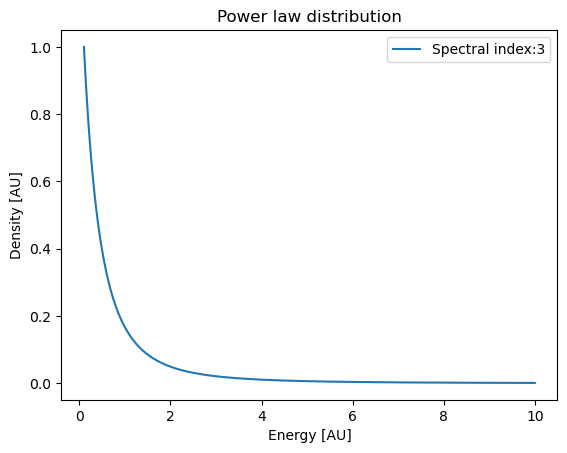

In [48]:
x_array1 = np.linspace(1,10,1001)
p=3
plt.plot(x_array,PowerLaw(x_array1,p=p,N_null=1),label=f'Spectral index:{p}')
plt.xlabel('Energy [AU]')
plt.ylabel('Density [AU]')
plt.title('Power law distribution')
plt.legend()
plt.show()

### Intensity of Self-Absorbtion Synchrotron Radiation

The intensity of the synchrotron radiation is related to the energy density of the particles in the following way:

$I(\nu) \propto \nu^{-(p-1)/2}$

However, when there is a high density of particles with relativistic speeds in the vicinity of the emitted synchrotron radiation, these particles absorb the radiation. In order for the particles to absorb the radiation, their energy needs to match that of the radiation. This phenomena of self absorption is dominate in lower frequencies where there is a larger density of electrons with lower energy due to the power law distribution. Hence, if you look at the spectrum from high frequencies towards the lower ones then the intensity of radiation will begin to decrease at a certain frequency - instead of increasing. This frequency where the turn over occurs is the frequency where the optical depth is equal to unity. Frequencies lower than it are absorbed and less radiation is emitted towards us hence these frequencies are more opaque (optically thick). Frequencies above are less abosrobed and are emitted to us hence these frequencies are transparent (optically thin).

The relationship between frequency and radiation in the thick optical specturm is:

$I(\nu) \propto \nu^{5/2}$


What then defines the frequency, denoted as $\nu_1$, at which the optical depth is equal to unity?

$\nu_1$ depends on a few parameters:

B: The magnetic field. A stronger magnetic field causes larger accelaration which causes radiation at higher frequencies. 

R: Radius. A larger portion of the  shockwave volume which interacts with the CSM results with a larger area with density of relativistic electrons which can absorb the radiation.

p: The spectral index which defines the distribution of energy of the electrons.

$N_0$: The electron density. Higher density results with higher absorption.

To summarize up to now, the expected intensity spectrum from a self absorbed synchrotron radiation should have:

A regime of low frequencies, where the intensity inclines and is proportional to the frequency to the power of 5/2. 

A turn over frequency $\nu_1$ from where the intensity declines and is proportional to the frequency to the power of the spectral index.

In the article of Chevalier (1998), the intensity is defined as following:

$I(\nu) = S(\nu_1)J$

$S(\nu_1)$ is the intensity at the frequency where the optical depth is at unity.

$J(z,p)=z^(5/2)*(1-exp[-z^-(p+4)/2])$

where
$z=\nu/\nu_1$

Following is a graph which shows the general behavior of the expected intensity spectrum. 

The graph has the following parameters: $S(\nu_1)=1$, $\nu_1 = 1$ and p=2.8:

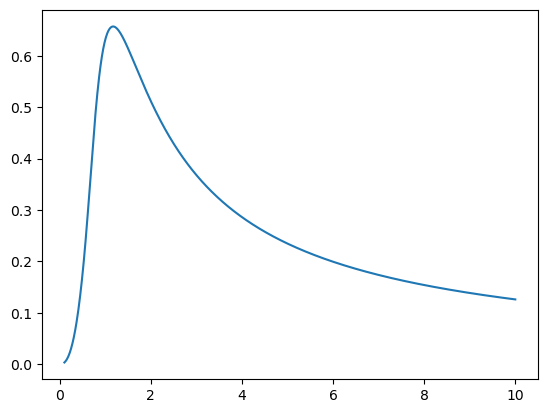

In [43]:
def I(x,S, nu1, p):
    F = S*(x/nu1)**2.5*(1-np.exp(-(x/nu1)**(-(p+4)/2)))
    return F

x_array = np.linspace(1e-1,10,1001)
plt.plot(x_array,I(x_array,1,1,2.8))
plt.show()

It is worthwhile to note that the maximum of this normalized graph is equal to 0.657. This number is independent of $\nu_1$ and p. 

Another worthwhile note is that the maximum intensity doesn't occure at $\nu=\nu_1$ but rather at $\nu = 1.17*\nu_1$

In [44]:
max_I = max(I(x_array,1,1,2.8))
print('Maximum of I:', '%.3f' %max_I)

Maximum of I: 0.657


### Flux density - the observable measured data in a radio telescope

When collecting the radio spectrum from a supernova, we don't collect the intensity but rather the flux density.

The observable flux is the sum of the intensity over the solid angle of the emitting source.

$F=\int Id\Omega \approx I\Omega$ 

$\Omega=\pi(\frac{R}{D})^2$

Where R is the radius of the shockwave and D is the distance to the source.

In the Intensity equation mentioned above there is a term which represents the intensity at $\nu_1$. According to Chevallier in his article from 1998, the term is: $S(\nu_1)=\frac{c5}{c6}(Bsin\Theta)^{-1/2}(\frac{\nu_1}{2c1})^{5/2}$

c1 is a constant which is given in the article. c5 & c6 are parameters which are dependent on the spectral index.

$\Theta$ is the particle pitch angle which is nearly 90 degrees hence $sin\theta$ can be approximated to 1.

Therefore $F = \pi\frac{R^2}{D^2}S(\nu_1)J(\frac{\nu}{\nu_1},p)=\pi\frac{R^2}{D^2}\frac{c5}{c6}B^{-1/2}(\frac{\nu}{2c1})^{5/2}(1-exp[-\frac{\nu}{\nu_1}^{-(p+4)/2}])$ 

Using this equation, we can generate the spectrum which we expect to measure from a SN as a function of $R,B,\nu_1$ and p.

Generally speaking, R, B and p are independent. 

R is determined by the initial blast of the SN. 

B has to do with the material blown off from the progenitor star and other parameters. 

p has to do with the power law distribution of energetic electrons.

### SN2011dh

As a first stage, I will generate these expected spectrums using values of $R,B,\nu_1$ and p of SN2011dh from an article by Krauss (2018).

Following are all the measured and calculated data in the Krauss article.

In [49]:
#Units
GHz = 1e9
mJy = 1e-3 * 1e-23 #cgs
Mpc = 3.086 * 1e24 #cm

"""
Observable data in tables 1&2. 
Each row is an observation epoch. The number in the first column is the time, in days, after the explosion.
The following values in the row are the flux density measured at different frequencies during a single epoch.
"""
data_table = np.array([
    [16.4, np.nan, np.nan, np.nan, np.nan, 2.430, 4.090, 5.535, 6.970, 6.790, 6.500, 5.130, 4.600, 3.470],
    [20.4, np.nan, np.nan, 0.540, 1.400, 3.150, 4.800, 5.870, 5.940, 5.313, 4.560, 3.610, 3.117, 2.190],
    [25.4, 0.243, 0.800, 1.626, 2.920, 4.920, 5.980, 6.935, 5.574, 4.744, 3.700, 2.880, 2.349, 1.644],
    [35.3, 0.331, 1.236, 2.982, 4.908, 6.871, 7.222, 6.820, 4.334, 3.917, 2.920, 2.530, 2.063, 1.772],
    [45.3, 0.719, 1.858, 4.092, 6.188, 7.836, 6.987, 6.082, 3.790, 2.960, 2.493, 1.819, 1.549, 1.159],
    [58.2, 2.470, 3.310, 5.840, 7.330, 7.470, 6.110, 5.097, 2.830, 2.320, 2.350, 1.530, 1.320, np.nan],
    [92.9, 3.450, 5.000, 7.020, 6.980, 4.884, 3.941, 2.891, 1.627, 1.321, 1.280, 0.710, 0.600, np.nan],
])

error_table = np.array([
    [16.4, np.nan, np.nan, np.nan, np.nan, 0.044, 0.063, 0.057, 0.074, 0.073, 0.20, 0.16, 0.14, 0.11],
    [20.4, 0.065, 0.06, 0.079, 0.055, 0.043, 0.055, 0.06, 0.064, 0.057, 0.14, 0.12, 0.097, 0.074],
    [25.4, 0.079, 0.066, 0.07, 0.061, 0.063, 0.07, 0.071, 0.08, 0.096, 0.13, 0.11, 0.077, 0.064],
    [35.3, 0.072, 0.067, 0.073, 0.072, 0.091, 0.078,0.071,0.068,0.073,0.11,0.1,0.073,0.074],
    [45.3, 0.074, 0.069, 0.083, 0.08, 0.086, 0.077, 0.064, 0.063, 0.067, 0.097, 0.08, 0.053, 0.051],
    [58.2, 0.12, 0.11, 0.15, 0.14, 0.12, 0.11, 0.057, 0.14, 0.14, 0.15, 0.16, 0.15, 0.345],
    [92.0, 0.11, 0.12, 0.17, 0.1, 0.073, 0.061, 0.043, 0.064, 0.072, 0.15, 0.1, 0.11, 0.21],
])

#The frequencies, in GHz, at which the measurements were done
freq = np.array([1.4, 1.8, 2.5, 3.5, 4.9, 6.7, 8.4, 13.5, 16.0, 20.5, 25.0, 29.0, 36.0])

#Cleaning the data from nan
days = np.array(data_table[:,0])
data_w_nan = data_table[:,1:]
error_w_nan = error_table[:,1:]

#Calculated values in table 3 of the article
Fnu1_article = [7.03, 6.19, 6.52, 7.28, 7.36, 7.69, 6.44]
nu1_article = [10, 8.13, 6.18, 4.72, 3.91, 3.18, 2.23]
R_article = 1e15*np.array([3.2, 3.7, 5.0, 6.9, 8.4, 11, 14])
B_article =[1.21, 1, 0.76, 0.57, 0.47, 0.38, 0.27]

#Parameters
c1 = 6.27e18/GHz #constant given in the article in cgs units.
c5 = 7.52e-24    #taken from the book of Pacholczyk for a value of p=3
c6 = 7.97e-41    #taken from the book of Pacholczyk for a value of p=3

### Expected spectrum curves

In the following Flux function a very small number is added to z in order to avoid it from being zero in the process of the fitting.
There is an additional 1.58 factor in order to normalize the $J$ function to unity when at maximum.

In [9]:
def Flux(x, R, D, B, nu1, p):
    z = x / nu1
    a = (p + 4) / 2
    F = 1.58*np.pi * (R/D)**2 * (c5/c6) * B**(-1/2) * (x/(2*c1))**(5/2) * (1 - np.exp(-np.maximum(z,1e-10) ** (-a)))
    return F

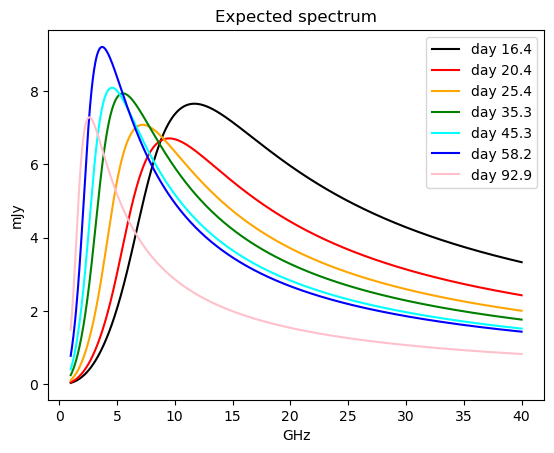

In [10]:
x_freq = np.linspace(1,40,1001)

colors = np.array(['black', 'black', 'red', 'red', 'orange', 'orange', 'green', 'cyan', 'cyan',\
                   'blue', 'blue', 'pink', 'pink'])

for i in range(len(days)):
    plt.plot(x_freq,1/mJy*Flux(x_freq,R=R_article[i],D=8.4*Mpc,B=B_article[i],nu1=nu1_article[i],p=2.8)\
             ,c=colors[i*2],label=f'day {days[i]}')
    plt.xlabel('GHz')
    plt.ylabel('mJy')
    plt.title('Expected spectrum')
    plt.legend()

    
    

Following is the logarithmic scale including the measured data for 3 epochs.

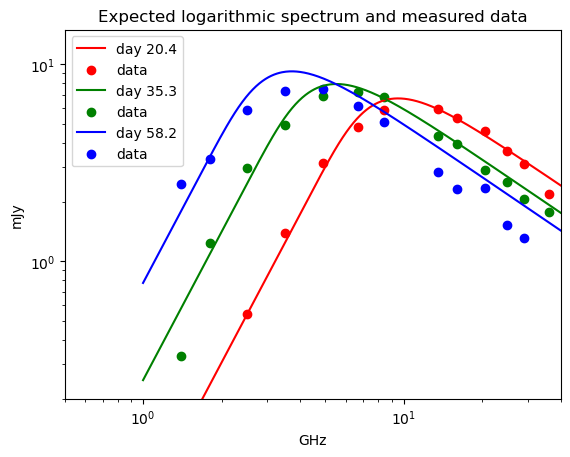

In [11]:
for i in range(1,len(days),2):
    plt.plot(x_freq,1/mJy*Flux(x_freq,R=R_article[i],D=8.4*Mpc,B=B_article[i],nu1=nu1_article[i],p=2.8)\
             ,c=colors[i*2],label=f'day {days[i]}')
    
    # Filter out NaN values
    valid_indices = ~np.isnan(data_w_nan[i])
    data = data_w_nan[i][valid_indices]
    error = error_w_nan[i][valid_indices]

    plt.scatter(freq[valid_indices],data,c=colors[i*2],label='data')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.5,40)
    plt.ylim(0.2,15)
    plt.xlabel('GHz')
    plt.ylabel('mJy')
    plt.title('Expected logarithmic spectrum and measured data')
    plt.legend()

As seen above, the data fits the earlier days better than the later days.
I believe this has to do with the change in spectral index over time (due to cooling?) which also determines the values for c5 & c6 which affect the value of the maximum flux. 

As an example, by setting p=3.1 for day 58.2, without changing c5 & c6, then we have the following curve which gives a better fit:

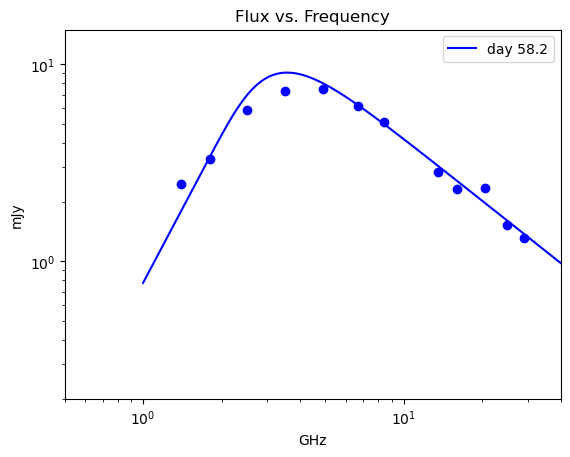

In [12]:
plt.plot(x_freq,1/mJy*Flux(x_freq,R=R_article[-2],D=8.4*Mpc,B=B_article[-2],nu1=nu1_article[-2],p=3.1)\
             ,c=colors[-2*2],label=f'day {days[-2]}')
    
# Filter out NaN values
valid_indices = ~np.isnan(data_w_nan[-2])
data = data_w_nan[-2][valid_indices]
error = error_w_nan[-2][valid_indices]

plt.scatter(freq[valid_indices],data,c=colors[-2*2])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5,40)
plt.ylim(0.2,15)
plt.xlabel('GHz')
plt.ylabel('mJy')
plt.title('Flux vs. Frequency')
plt.legend()

However, for the purpose of this calculation, I will assume a fixed value of p=2.8 for all epochs.

## Expected Radius

The goal is to calculate the Radius of the shockwave from the given data.

By fitting a curve to the measured data of a spectrum, at a single epoch, we can extract the spectral index, $\nu_1$ and the flux at $\nu_1$ i.e. $F(\nu_1)$.

It is important to note that $F\nu_1$ isn't necessarly the maximum Flux. However, one can find this value once $\nu_1$ is found - it is the flux at which $\nu=\nu_1$.

Trying to fit all three parameters ($F(\nu_1), \nu_1, p$) at once isn't straightforward. One method to do the fitting is by seting p to a specific value and only fitting $F(\nu_1)$ and $\nu_1$ to the curve.

As mentioned above:

(1) $F=F(\nu_1)J=\pi\frac{R^2}{D^2}\frac{c5}{c6}(B)^{-1/2}(\frac{\nu_1}{2c1})^{5/2}J$


Once we find $\nu_1$ and $F\nu_1$ we are left with the two parameters: R & B. 

We will now find a way express B as a function of R, $\nu_1$ and p.

Earlier I mentioned that $\nu_1$ depends on a few parameters.

In equation 1 of Chevalier(1998), a relationship between $\nu_1$, B, R and $N_0$ is given. The relationship is: 

(2) $\nu_1=2c_1(sc_6)^{2/(p+4)}N_0^{2/(p+4)}B^{(p+2)/(p+4)}$

$s$ has to do with the emitting volume of the shockwave in the following way:
$\pi R^2 s = \frac{4}{3} \pi f R^2$ where f is the filling factor of the volume of the shockwave. Hence $s=\frac{4}{3}fR$ 

### Equipartition equation

The equipartition assumes that the energy density of the magnetic field and the energy density of the relativistic electrons are equal. At such an equilibrium, the total energy is at minimum - which is the natural state.

The term for the magnetic energy density is $\frac {B^2}{8\pi}$

The energy density of the electrons is $\int N(E)E dE$

Chevalier brings in the 1998 article the following equipartition relationship between $N_0$, p and B. 

(3) $N_0=\frac{\alpha B^2(p-2)E_l^{p-2}}{8\pi}$

Where $\alpha$ is the equipartition parameter, which we will set to 1, and $E_l$ is the energy of the rest mass of an electron: 0.51 MeV.



The last two equations, (2) & (3), can be used to find a relationship between $\nu_1$, R, p and B. 

Hence B, as a function of R, p and $\nu_1$ can be plugged in equation (1) and R can be extracted.

In order to test this method, I will first use values from the Krauss (2018) article and plug them in equation (1) and equation (2) to make sure that the equations make sense.

In [13]:
for i in range(len(days)):
    print('Expected Flux_nu1 for day',days[i],'is', 1/mJy*Flux(x=nu1_article[i],R=R_article[i],D=8.4*Mpc,\
                                                               B=B_article[i],nu1=nu1_article[i],p=2.8))
    print('Calculated Flux_nu1 in table 3 is', Fnu1_article[i],'\n')

Expected Flux_nu1 for day 16.4 is 7.365112905807817
Calculated Flux_nu1 in table 3 is 7.03 

Expected Flux_nu1 for day 20.4 is 6.455084764095798
Calculated Flux_nu1 in table 3 is 6.19 

Expected Flux_nu1 for day 25.4 is 6.812029776312715
Calculated Flux_nu1 in table 3 is 6.52 

Expected Flux_nu1 for day 35.3 is 7.636386261304125
Calculated Flux_nu1 in table 3 is 7.28 

Expected Flux_nu1 for day 45.3 is 7.784373652648201
Calculated Flux_nu1 in table 3 is 7.36 

Expected Flux_nu1 for day 58.2 is 8.855916425038181
Calculated Flux_nu1 in table 3 is 7.69 

Expected Flux_nu1 for day 92.9 is 7.008232226695467
Calculated Flux_nu1 in table 3 is 6.44 



There is a 5% deviation. For our purposes we will leave it as is and continue on.

In [14]:
El=0.51e6*1.6e-12

def nu_1(a,p,B,R,f):
    N_null = (a * B**2 * (p-2) * El**(p-2))/(8*np.pi)
    s=4*f*R/3
    F = 2 * c1 * (s*c6*N_null)**(2/(p+4)) * B**((p+2)/(p+4))
    return F

for i in range(len(days)):
    print('Expected nu_1 for day',days[i],'is',nu_1(a=1,p=2.8,B=B_article[i],R=R_article[i],f=0.5))
    print('Calculated nu_1 in table 3 is',nu1_article[i],'\n')

Expected nu_1 for day 16.4 is 11.153413625777901
Calculated nu_1 in table 3 is 10 

Expected nu_1 for day 20.4 is 9.095329369847269
Calculated nu_1 in table 3 is 8.13 

Expected nu_1 for day 25.4 is 6.966882022060114
Calculated nu_1 in table 3 is 6.18 

Expected nu_1 for day 35.3 is 5.278298417218968
Calculated nu_1 in table 3 is 4.72 

Expected nu_1 for day 45.3 is 4.357156678614055
Calculated nu_1 in table 3 is 3.91 

Expected nu_1 for day 58.2 is 3.5824717937521973
Calculated nu_1 in table 3 is 3.18 

Expected nu_1 for day 92.9 is 2.4712379815490015
Calculated nu_1 in table 3 is 2.23 



Also here, there is some consistant offset. I will leave it for now and continue with the derivation.

As mentinoed above, we have these two equations:

(2) $\nu_1=2c_1(\frac{4}{3}fRc_6N_0)^{2/(p+4)}B^{(p+2)/(p+4)}$

(3) $N_0=\frac{\alpha B^2(p-2)E_l^{p-2}}{8\pi}$

We will plug equation (3) into (2) to get the following:

$\nu_1=2c_1(\frac{1}{6\pi}fRc_6\alpha (p-2)E_l^{p-2})^{2/(p+4)}B^{(p+6)/(p+4)}$

$\frac{\nu_1}{2c_1}(\frac{1}{6\pi}fRc_6\alpha (p-2)E_l^{p-2})^{-2/(p+4)}=B^{(p+6)/(p+4)}$

$(\frac{\nu_1}{2c_1})^{(p+4)}(\frac{1}{6\pi}fRc_6\alpha (p-2)E_l^{p-2})^{-2}=B^{(p+6)}$

$(\frac{\nu_1}{2c_1})^{(p+4)/(p+6)}(\frac{1}{6\pi}fRc_6\alpha (p-2)E_l^{p-2})^{-2/(p+6)}=B$

$(\frac{\nu_1}{2c_1})^{(p+4)/(p+6)}R^{-2/(p+6)}(\frac{1}{6\pi}fc_6\alpha (p-2)E_l^{p-2})^{-2/(p+6)}=B$

$B^{-1/2}=(\frac{\nu_1}{2c_1})^{-(p+4)/2(p+6)}R^{1/(p+6)}(\frac{1}{6\pi}fc_6\alpha (p-2)E_l^{p-2})^{1/(p+6)}$

Now that we can express B as a function of R,p and $\nu_1$ then we can plug B into equation (1).


(1) $F=\pi\frac{R^2}{D^2}\frac{c5}{c6}(B)^{-1/2}(\frac{\nu_1}{2c1})^{5/2}J$

(1) $F=\pi\frac{R^2}{D^2}\frac{c5}{c6}(\frac{\nu_1}{2c_1})^{-(p+4)/2(p+6)}R^{1/(p+6)}(\frac{1}{6\pi}fc_6\alpha (p-2)E_l^{p-2})^{1/(p+6)}(\frac{\nu_1}{2c1})^{5/2}J$

(1) $F=\frac{\pi c5}{c6D^2}R^{(2p+13)/(p+6)}(\frac{\nu_1}{2c_1})^{-(p+4)/2(p+6)}(\frac{1}{6\pi}fc_6\alpha (p-2)E_l^{p-2})^{1/(p+6)}(\frac{\nu_1}{2c1})^{5/2}J$

(1) $F=\frac{\pi c5}{c6D^2}R^{(2p+13)/(p+6)}(\frac{\nu_1}{2c_1})^{(2p+13)/(p+6)}(\frac{1}{6\pi}fc_6\alpha (p-2)E_l^{p-2})^{1/(p+6)}J$

(1) $\frac{FD^2}{\pi}\frac{c6}{c5}(\frac{\nu_1}{2c_1})^{-(2p+13)/(p+6)}(\frac{1}{6\pi}fc_6\alpha (p-2)E_l^{p-2})^{-1/(p+6)}J^{-1}=R^{(2p+13)/(p+6)}$

When $\nu=\nu_1$, J becomes a number, i.e. $1-exp^{-1}$ = 0.632. We will normalize it to equal 1 in order for it to fit the numbers in the article which were normalized accordingly.


Now we have an expression for R as a function of $F(\nu_1)$, $\nu_1$ and p. 

$R=(\frac{F(\nu_1)D^2}{\pi}\frac{c6}{c5})^{(p+6)/(2p+13)}(\frac{\nu_1}{2c_1})^{-1}(\frac{1}{6\pi}fc_6\alpha (p-2)E_l^{p-2})^{-1/(2p+13)}$


### Testing the derivation of R

First, I will use the parameters in the article to make sure that this last derivation of R makes sense.

In [15]:
def Radius(Fnu1,D,p,nu1,f,a):
    F = (Fnu1*D**2*c6/(np.pi*c5))**((p+6)/(2*p+13)) * (2*c1/nu1) * (f*c6*a*(p-2)*El**(p-2)/(6*np.pi))**(-1/(2*p+13))
    return F

In [16]:
for i in range(len(days)):
    R=1e-15*Radius(Fnu1=mJy*Fnu1_article[1],D=8.4*Mpc,p=2.8,nu1=nu1_article[i],f=0.5,a=1)
    print('Derived SN Radius:',R)
    print('Radius in article:',1e-15*R_article[i],'\n')

Derived SN Radius: 2.8874336973652786
Radius in article: 3.2 

Derived SN Radius: 3.551578963548928
Radius in article: 3.7 

Derived SN Radius: 4.672222811270679
Radius in article: 5.0 

Derived SN Radius: 6.117444274078982
Radius in article: 6.9 

Derived SN Radius: 7.384740913977695
Radius in article: 8.4 

Derived SN Radius: 9.079980180393958
Radius in article: 11.0 

Derived SN Radius: 12.94813317204161
Radius in article: 14.000000000000002 



Again, some offset but good enough for now.

### Fitting the observable data

As seen earlier, when plotting the observable measured data as a function of frequency, they have a similar behavior to the expected curves given in equation (1). Hence it makes sense to fit to the data this equation.

Next, I will fit the expected Flux function (equation 1) to the measured observable data in order to find $F\nu_1$ & $nu_1$.

Including the spectral index p to the fitting process, such that it will fit all three parameters at once, doesn't result with fine enough results. 
Therefor I set p=2.8.
Ideally, I should run the fit process for different values of p in order to find which p gives the best fit. Alternatively, it is possible to iterate between p and the other two parameters. However, it seems from other articles that p is typically in the range of 3 and that small deviation of its value doesn't affect $\nu1$ drastically.



In [21]:
array_Fnu1 = []
array_nu1 = []

def Flux_fit(x, Fnu1, nu1):
    z = x / nu1
    a = (2.8 + 4) / 2
    F = Fnu1 * np.maximum(z,1e-10)**(5/2) * (1 - np.exp(-np.maximum(z,1e-10) ** (-a)))
    return F

for i in range(len(days)):
    # Filter out NaN values
    valid_indices = ~np.isnan(data_w_nan[i])
    data = data_w_nan[i][valid_indices]
    error = error_w_nan[i][valid_indices]

    # Perform the curve fitting
    par_bound = ([1e-1 ,1],[2e1, 15])
    par, cov = curve_fit(Flux_fit, freq[valid_indices], data, sigma=error, absolute_sigma=True,\
    bounds=par_bound)

    Fnu1 = (1/1.582)*par[0]
    array_Fnu1.append(Fnu1)

    nu1 = par[1]
    array_nu1.append(nu1)
    
    print(f"Day {days[i]}: Fnu1 from fit", "%.2f" % Fnu1, " nu1 from fit", "%.2f" % nu1)
    print(f"Day {days[i]}: Fnu1 article ", Fnu1_article[i] , " nu1 article ", nu1_article[i],'\n')

array_Fnu1 = np.array(array_Fnu1)
array_nu1 = np.array(array_nu1)

Day 16.4: Fnu1 from fit 7.03  nu1 from fit 9.98
Day 16.4: Fnu1 article  7.03  nu1 article  10 

Day 20.4: Fnu1 from fit 6.19  nu1 from fit 8.12
Day 20.4: Fnu1 article  6.19  nu1 article  8.13 

Day 25.4: Fnu1 from fit 6.52  nu1 from fit 6.18
Day 25.4: Fnu1 article  6.52  nu1 article  6.18 

Day 35.3: Fnu1 from fit 7.28  nu1 from fit 4.72
Day 35.3: Fnu1 article  7.28  nu1 article  4.72 

Day 45.3: Fnu1 from fit 7.35  nu1 from fit 3.92
Day 45.3: Fnu1 article  7.36  nu1 article  3.91 

Day 58.2: Fnu1 from fit 7.74  nu1 from fit 3.11
Day 58.2: Fnu1 article  7.69  nu1 article  3.18 

Day 92.9: Fnu1 from fit 6.52  nu1 from fit 2.19
Day 92.9: Fnu1 article  6.44  nu1 article  2.23 



The results show a pretty good match between the fitted parameters of $F\nu_1$ and $nu_1$ and the ones in the article.

Next I will calculte R.

### Calculating the Radius

In [32]:
for i in range(len(days)):
    R=1e-15*Radius(Fnu1=mJy*array_Fnu1[i],D=8.4*Mpc,p=2.8,nu1=array_nu1[i],f=0.5,a=1)
    print('Derived SN Radius:',"%.1f" % R)
    print('Radius in article:',1e-15*R_article[i],'\n')

Derived SN Radius: 3.1
Radius in article: 3.2 

Derived SN Radius: 3.6
Radius in article: 3.7 

Derived SN Radius: 4.8
Radius in article: 5.0 

Derived SN Radius: 6.6
Radius in article: 6.9 

Derived SN Radius: 8.0
Radius in article: 8.4 

Derived SN Radius: 10.3
Radius in article: 11.0 

Derived SN Radius: 13.5
Radius in article: 14.000000000000002 



The match is quite good.

After finding R, we can easily extract the magnetic field B.

### The Magnetic field

As mentioned earlier, $F(\nu_1)=\pi\frac{R^2}{D^2}\frac{c5}{c6}(B)^{-1/2}(\frac{\nu_1}{2c1})^{5/2}$

Hence

$B^{1/2}=F(\nu_1)^{-1}\pi\frac{R^2}{D^2}\frac{c5}{c6}(\frac{\nu_1}{2c1})^{5/2}$

$B=[F(\nu_1)^{-1}\pi\frac{R^2}{D^2}\frac{c5}{c6}(\frac{\nu_1}{2c1})^{5/2}]^2$

In [41]:
def MagneticField(Fnu1,nu1,R,D):
    F=(Fnu1**(-1)*np.pi*(R/D)**2*(c5/c6)*(nu1/(2*c1))**(5/2))**2
    return F

for i in range(len(days)):
    print('Expected B for day',days[i],'is' ,MagneticField(Fnu1=mJy*array_Fnu1[i],nu1=array_nu1[i],\
                                                                 R=R_article[i],D=8.4*Mpc))
    print('Calculated B in table 3 is', B_article[i],'\n')

Expected B for day 16.4 is 1.3166895499039457
Calculated B in table 3 is 1.21 

Expected B for day 20.4 is 1.0821253432450229
Calculated B in table 3 is 1 

Expected B for day 25.4 is 0.832725480307929
Calculated B in table 3 is 0.76 

Expected B for day 35.3 is 0.6308688044525074
Calculated B in table 3 is 0.57 

Expected B for day 45.3 is 0.5353051439755581
Calculated B in table 3 is 0.47 

Expected B for day 58.2 is 0.44801875278132675
Calculated B in table 3 is 0.38 

Expected B for day 92.9 is 0.2880417132628971
Calculated B in table 3 is 0.27 



Pretty good match for B.